In [1]:
from sklearn import datasets
bc = datasets.load_breast_cancer()

# importing the data. Breast Cancer dataset

In [140]:
X_bc, y_bc = bc.data, bc.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
X_bc, y_bc, test_size = .3 , random_state = 42)

# splitting the data into train and test datasets

In [3]:
import numpy as np
import numpy.linalg

# importing numpy library

In [4]:
#this section is used to compute prior distribution, mean, covariance matrix

def parameters(X_train, y_train):
    classes = list(np.unique(y_train))
    #identify classes
    
    data = []
    
    for k in classes:
        
        temp = []
        
        indices = np.where(np.isin(y_train, k))
        X_k = X_train[indices]
        # sort X by class labels
        
        prior_dist = float(len(X_k))/float(len(X_train))
        # prior distribution p(k)
        
        mean = (np.sum(X_k,axis=0) / float(len(X_k))).reshape(-1,1)
        # the true mean of each class k
        
        sigma_k = 1/len(X_k) * sum([(x.reshape(-1,1) - mean).dot((x.reshape(-1,1) - mean).T) for x in X_k])
        # covariance matrix of class k
        
        temp.append(k)
        temp.append(prior_dist)
        temp.append(mean)
        temp.append(sigma_k)
        
        data.append(np.array(temp))
        # store every class k in data 
    
    sigma = 1/len(X_train)*sum([(x.reshape(-1,1)-mean).dot((x.reshape(-1,1)-mean).T) for x in X_train])

    return data, sigma

In [14]:
def classifier(X_train, data, sigma, alpha):
    
    Qk_x = []
    
    for k in data:
        prior_dist = k[1]
        mean = k[2]
        sigma_k = k[3]
        sigma_k = (1-alpha)*sigma+alpha*sigma_k  
         
        sigma_k_inv = numpy.linalg.inv(sigma_k)
        
        MLE = []
        for x in X_train:
            x_i = x.reshape(-1,1)
            temp = np.log(prior_dist) - 0.5 * numpy.linalg.multi_dot([(x_i-mean).T,sigma_k_inv,(x_i-mean)]) - 0.5 * np.log(numpy.linalg.det(sigma_k))
            MLE.append(temp)
        Qk_x.append(np.array(MLE).reshape(-1,1))
    
    k_max = np.argmax(np.concatenate(Qk_x,axis=1),axis=1)
    y_hat = []
    for i in range(np.size(k_max)):
        y_hat.append(data[k_max[i]][0])
        
    return y_hat

In [23]:
data, sigma = parameters(X_train,y_train)
y_hat = classifier(X_train, data, sigma, alpha = 0.5)
print("The accuracy score for the train data in Breast Cancer dataset at alpha = 0.5 is", accuracy_score(y_train,y_hat))

The accuracy score for the train data in Breast Cancer dataset at alpha = 0.5 is 0.9195979899497487


In [31]:
import matplotlib.pyplot as plt

In [44]:
def accuracy(X, y):
    
    y_points = []
    x_points = np.arange(0, 1, 0.01)
    
    for i in x_points:
        data, sigma = parameters(X,y)
        y_hat = classifier(X, data, sigma, alpha = i)
        score = accuracy_score(y,y_hat)
        y_points.append(score)
    
    return y_points

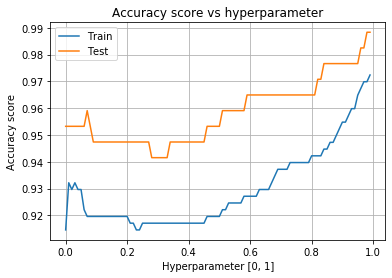

In [51]:
x_points = np.arange(0, 1, 0.01)
plt.plot(x_points, accuracy(X_train, y_train), label = "Train")
plt.plot(x_points, accuracy(X_test, y_test), label = "Test")
plt.title("Accuracy score vs hyperparameter")
plt.xlabel("Hyperparameter [0, 1]")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid()

plt.savefig("01.png")

In [62]:
scores_y_test = accuracy(X_test, y_test)


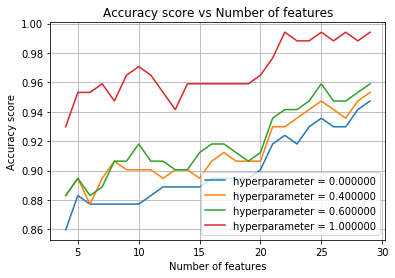

In [136]:
X_subset = []

number_features = np.shape(X_train)[1]
alphas = [0, 0.4, 0.6, 1]

y_plot = []

for hyper_p in alphas:
    for i in range(4, number_features):
        X_subset = X_test[:, :i]
        data, sigma = parameters(X_subset,y_test)
        prediction = classifier(X_subset, data, sigma, hyper_p)
        score = accuracy_score(y_test,prediction)
        y_plot.append(score)
   
    plt.plot(range(4, number_features), y_plot, label = "hyperparameter = %f" % hyper_p, )
    plt.legend()
    y_plot = []
plt.grid()
plt.title("Accuracy score vs Number of features")
plt.xlabel("Number of features")
plt.ylabel("Accuracy score")

plt.savefig("02.png")

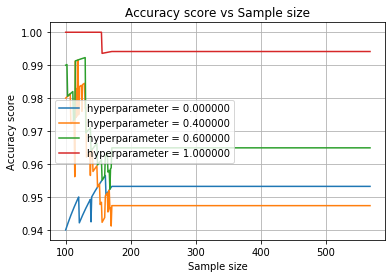

In [154]:
sample_size = np.shape(X_bc)[0]

for hyper_p in alphas:
    for i in range(100, sample_size):
        X_subset = X_test[:i, :]
        data, sigma = parameters(X_subset,y_test[:i])
        prediction = classifier(X_subset, data, sigma, hyper_p)
        score = accuracy_score(y_test[:i],prediction)
        y_plot.append(score)
   
    plt.plot(range(100, sample_size), y_plot, label = "hyperparameter = %f" % hyper_p, )
    plt.legend()
    y_plot = []
plt.grid()
plt.title("Accuracy score vs Sample size")
plt.xlabel("Sample size")
plt.ylabel("Accuracy score")
plt.savefig("03.png")